Load file and filter relevant columns.

In [47]:
import pandas as pd

import utils
from importlib import reload
reload(utils)

csv_file_path = r'./data/who_age_standardized_suicide_rates_per_100k_population_data_till_2019.csv'
complete_df = pd.read_csv(csv_file_path)
rates_df = complete_df.filter(items=['Location', 'Period', 'Dim1', 'Value'])

print(rates_df.head())

              Location  Period        Dim1               Value
0  Antigua and Barbuda    2019        Male           0 [0 – 0]
1             Barbados    2019      Female  0.16 [0.11 – 0.22]
2             Barbados    2019  Both sexes  0.31 [0.22 – 0.42]
3  Antigua and Barbuda    2019  Both sexes  0.32 [0.22 – 0.45]
4             Barbados    2019        Male  0.49 [0.34 – 0.65]


Notice the Value conlumn contains str, which is not easy to use, let's convert it.

Add the float values to the dataframe.

In [48]:
from utils import extract_value

rates_df['Float_Value'] = rates_df.Value.apply(extract_value)

print(rates_df.head())

              Location  Period        Dim1               Value  Float_Value
0  Antigua and Barbuda    2019        Male           0 [0 – 0]         0.00
1             Barbados    2019      Female  0.16 [0.11 – 0.22]         0.16
2             Barbados    2019  Both sexes  0.31 [0.22 – 0.42]         0.31
3  Antigua and Barbuda    2019  Both sexes  0.32 [0.22 – 0.45]         0.32
4             Barbados    2019        Male  0.49 [0.34 – 0.65]         0.49


Check the values in Period and Dim1.

In [49]:
import numpy as np 

print(rates_df.Dim1.unique())
print()
print(rates_df.Period.unique())

assert np.all(rates_df.Period.apply(type) == int)

['Male' 'Female' 'Both sexes']

[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2004 2003 2002 2001 2000]


Filter 2019 data for both sexes.

In [50]:
both_sexes_2019 = rates_df[(rates_df.Dim1 == 'Both sexes') & (rates_df.Period == 2019)]

A quick overlook of the overall suicide rates.

In [51]:
both_sexes_2019.Float_Value.describe()

count    183.000000
mean      10.078689
std        8.696333
min        0.310000
25%        5.260000
50%        8.280000
75%       12.375000
max       87.480000
Name: Float_Value, dtype: float64

Note that around 75% of the countries have suicide rates under 12.4 per 100k population,  
but the max value is relative large and far away at around 87 per 100k population,   
which is about 7 times the rates of more than 75% the countires. 

Sort and see the both ends.

In [52]:
both_sexes_2019.sort_values(by='Float_Value')

,Location,Period,Dim1,Value,Float_Value
2,Barbados,2019,Both sexes,0.31 [0.22 – 0.42],0.31
3,Antigua and Barbuda,2019,Both sexes,0.32 [0.22 – 0.45],0.32
7,Grenada,2019,Both sexes,0.64 [0.45 – 0.88],0.64
19,Saint Vincent and the Grenadines,2019,Both sexes,1.01 [0.7 – 1.41],1.01
48,Jordan,2019,Both sexes,1.98 [1.29 – 2.9],1.98
...,...,...,...,...,...
265,Micronesia (Federated States of),2019,Both sexes,28.99 [11.8 – 47],28.99
317,Kiribati,2019,Both sexes,30.56 [19.07 – 45.69],30.56
363,Eswatini,2019,Both sexes,40.46 [20.07 – 69.18],40.46
364,Guyana,2019,Both sexes,40.85 [27.04 – 66.78],40.85


Note that the worst country (Lesotho, 87.48) has a rate more than double of the second worst (Guyana, 40.85).

Have a overlook of the suicide rates distribution.

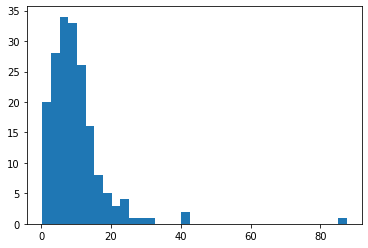

In [53]:
import matplotlib.pyplot as plt 

plt.hist(both_sexes_2019.Float_Value, bins='auto')
plt.show()

From the plot above we can see most of the suicide rates are below 35 per 100k population.  
Let's check the percentage below 35 and 20.

In [54]:
is_below_35 = both_sexes_2019.Float_Value < 35
is_below_20 = both_sexes_2019.Float_Value < 20

print(f'{is_below_35.sum() / is_below_35.size:.2%}' 
      ' of the countries have a suicide rates below 35 per 100k population.')
print(f'{is_below_20.sum() / is_below_20.size:.2%}' 
      ' of the countries have a suicide rates below 20 per 100k population.')

98.36% of the countries have a suicide rates below 35 per 100k population.
91.80% of the countries have a suicide rates below 20 per 100k population.


In [55]:
from typing import List, Union


class ColorBounder:
    """a helper class to match a color for a certain value"""
    def __init__(self, colors: List[str], bounds: List[int]) -> None:
        """
        colors - color names
        bounds - in increasing order

        note:
        for values below the lower bound, the color is 'silver' 
        """
        assert len(colors) == len(set(colors))
        assert len(bounds) == len(set(bounds))
        assert len(colors) == len(bounds)
        assert bounds == sorted(list(bounds))
        assert 'silver' not in set(colors)
        self._colors = ['silver'] + list(colors)
        self._bounds = pd.Series(bounds)

    def find_color(self, x: Union[float, int]) -> str:
        """
        if x < bounds[0], matches 'silver'
        if bounds[i] <= x < bounds[i+1], matches color[i] 
        if bounds[-1] <= x, matches color[-1]
        """
        return self._colors[self._bounds.searchsorted(x, side='right')]

cs = ['green', 'yellow', 'red']
bs = [0, 10, 20]
color_bounder = ColorBounder(cs, bs)
assert color_bounder.find_color(-1) == 'silver'
assert color_bounder.find_color(0) == 'green'
assert color_bounder.find_color(10) == 'yellow'
assert color_bounder.find_color(15) == 'yellow'
assert color_bounder.find_color(100) == 'red'

**Note: It is not that starightforward to install Cartopy, so I keep this for future reference.**

To install Cartopy on Window without Conda:
https://stackoverflow.com/questions/70177062/cartopy-not-able-to-identify-geos-for-proj-install-on-windows

then: 
pip install C:\Shapely\Shapely-1.8.2-cp310-cp310-win_amd64.whl

then:
pip install C:\Cartopy\Cartopy-0.20.2-cp310-cp310-win_amd64.whl

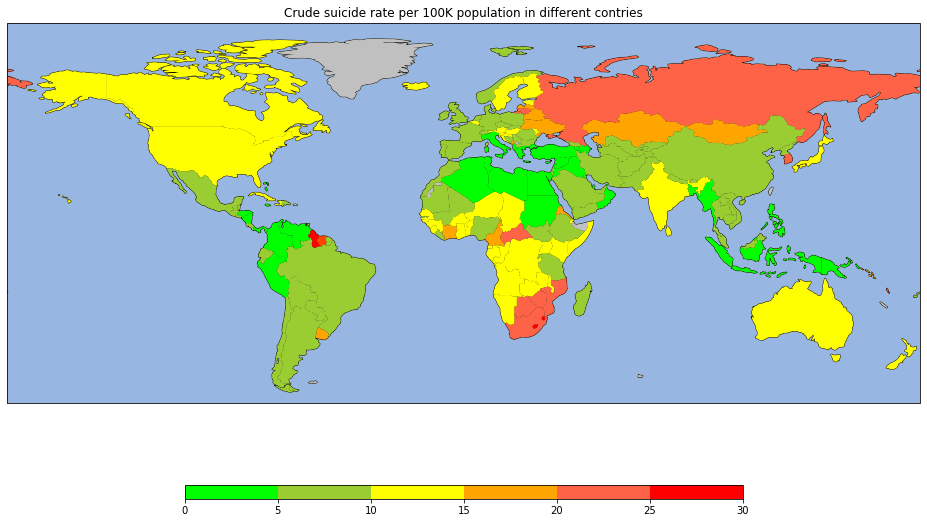

12 countries skipped.
These are the countries skipped: 
 {'Falkland Islands', 'French Southern and Antarctic Lands', 'Greenland', 'Western Sahara', 'Kosovo', 'New Caledonia', 'Antarctica', 'Turkish Republic of Northern Cyprus', 'Palestine', 'Somaliland', 'Taiwan', 'Puerto Rico'}


In [56]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from cartopy.crs import PlateCarree

import utils
from importlib import reload

reload(utils)
from utils import (make_scalar_colorbar, set_map_extend, countries_iterator,
                   add_basic_map_features, get_country_name_in_data,
                   get_suicide_rate, apply_color_to_country)


plt.figure(figsize=(20, 10))
ax = plt.axes(projection=PlateCarree())

set_map_extend(ax)
add_basic_map_features(ax)

data = both_sexes_2019

bounds = [0, 5, 10, 15, 20, 25, 30] # 7 in total
colors = ['lime', 'yellowgreen', 'yellow', 
          'orange',  'tomato', 'orangered','red']
color_bounder = ColorBounder(colors, bounds)

skipped = set()
for country in countries_iterator():
    name_in_map = country.attributes['NAME_EN']
    country_name = get_country_name_in_data(name_in_map, data)
    suicide_rate = get_suicide_rate(country_name, data)
    if suicide_rate < 0:
        skipped.add(name_in_map)
    apply_color_to_country(color_bounder.find_color(suicide_rate), 
                           country, ax, PlateCarree)

make_scalar_colorbar(bounds, colors, ax, 
                     location='bottom', aspect=40, shrink=0.5)

plt.title('Crude suicide rate per 100K population in different contries')
plt.show()

print(f'{len(skipped)} countries skipped.')
print('These are the countries skipped: \n', skipped)